<a href="https://colab.research.google.com/github/jeeyean1004/OpenDataWrangling/blob/master/0701_CNN%EC%9D%B4%EC%9A%A9_TEXT_%EB%A7%88%EC%9D%B4%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy #konlpy 설치

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [801 B]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:12 https://cloud.r-project.org/bin/linux/ub

In [0]:
from gensim.models import word2vec #gensim은 코랩에 이미 패키지로 있음
import codecs
from konlpy.tag import Twitter

In [0]:
twitter = Twitter()
word_list = twitter.pos("아버지가 방에 들어가신다.", norm=True, stem = True)
print(word_list)

/usr/local/lib/python3.6/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
/usr/local/lib/python3.6/dist-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


[('아버지', 'Noun'), ('가', 'Josa'), ('방', 'Noun'), ('에', 'Josa'), ('들어가다', 'Verb'), ('.', 'Punctuation')]


In [0]:
word_list = twitter.pos("실화라서더욱아름답고찡하네요...많이울었어요벌써4년이나지났네요~!.", norm=True, stem = True)
print(word_list)

[('실화', 'Noun'), ('라서', 'Josa'), ('더욱', 'Noun'), ('아름답다', 'Adjective'), ('찡하다', 'Adjective'), ('...', 'Punctuation'), ('많이', 'Adverb'), ('울다', 'Verb'), ('벌써', 'Noun'), ('4년', 'Number'), ('이나지났네요', 'Foreign'), ('~!.', 'Punctuation')]


In [0]:
from gensim.models import word2vec
import codecs
from konlpy.tag import Twitter
#분석할 파일 불러오기

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:

f = open('./gdrive/My Drive/Konlpy/CNN/voc_train16_17v1.csv',encoding = 'ms949')# encoding = 'euc-kr, engine = 'python')
#raw_voc = pd.read_csv('./gdrive/My Drive/Konlpy/CNN/voc_train16_17v1.csv',
#                     names=['voc'],sep=',', encoding='euc-kr',  engine='python')

In [0]:
data = f.read()
twitter = Twitter()
#전체 텍스트를 라인 단위로 나누어 배열로 저장
lines = data.split("\r\n") #문장별로 쪼갠다는 의미(\n) 새로운줄, (\r)줄 바꾸면 문서 맨 앞에 커서 표시된다.
results = []
for line in lines : 
  r = []
  #norm = True
  word_list=twitter.pos(line,norm = True , stem = True)
  #조사, 어미, 문장부호를 제외하고 배열에 추가
  for(word, pumsa) in word_list :
    if not pumsa in ["Josa","Eomi","Punctuation"]: #의미없는 품사 빼기, 조사,어미,문장부호 등
      r.append(word) # r.append 모든 어휘를 다 포함해서 할수도 있음..여기는 일부 뺌
      
output = ("".join(r)).strip() #strip 공백제거
#단어들을 파일에 저장
with open("./gdrive/My Drive/result/text_prepared.dat","w",encoding = "utf-8")as fp:
  fp.write(output)

/usr/local/lib/python3.6/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


#모델만들기

In [0]:
#저장된 파일을 이용하여 word2vec 모델을 만드는 과정
data = word2vec.LineSentence('./gdrive/My Drive/result/text_prepared.dat')

num_features = 100 #문자벡터 차원수
context_window = 1000 #문자열 창크기
min_word_count = 2 #최소문자수 ,출현빈도 2 미만 제외
num_workers = 8 #병렬처리 스레드 수
iteration = 500 #반복수, 기본값 5
downsampling = 1e-5 #문자 빈도수 다운샘플링 1 × 10^-3.
skip_gram = 1 #분석방법론은 CBOW와 Skip-Gram 을 선택해라.
    
model = word2vec.Word2Vec(data, 
                 size=num_features, #100차원으로 변경(100,300,500)
                 window=context_window, #앞뒤로 10개까지 보기
                 hs = 1, #소프트맥스 알고리즘 쓴다         
                 min_count=min_word_count, #2개 미만 출현 빈도는 버림
                 workers=num_workers, # CPU는 8를 써라 , 보통 노트북은 4이나 8로 변경,Tesla K80 GPU 300만원정도 함
                 iter=iteration, #100번 반복학습해라
                 #sample=downsampling, #1 × 10^-5 랜덤 값
                 seed=5, # 특정한 랜덤값에서 시작값을 주어 매번 같은값이 나오게 하는것
                 sg=skip_gram) #skip-gram 분석방법론은 CBOW와 Skip-Gram 을 선택해라.

#모델을 파일로 저장
model.save('./gdrive/My Drive/result/text_101.model')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 나눔고딕 설치
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

#시각화(word cloud)

In [0]:
stopwords_kr = ['차단기이상없음','차단기이상없다고함'] 

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = fontpath, 
                        stopwords = stopwords_kr, #빼버릴 단어
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

In [0]:
%time displayWordCloud(' '.join(sentences))

NameError: ignored

In [0]:
stopwords_kr = ['차단기이상없음','차단기이상없다고함','차단기 이상없음'] #빼버릴 단어 넣기
backgroundcolor = 'white'#배경색 지정

In [0]:

import matplotlib.pyplot as plt #워드 클라우드는 matplotlib와 동일한 기반이라 폰트도 같아야 한다
!pip install wordcloud
from wordcloud import WordCloud
text = open('./gdrive/My Drive/Konlpy/CNN/voc_train16_17v1.csv',encoding = 'ms949').read()
wordcloud = WordCloud(\
                     font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',stopwords = stopwords_kr, #빼버릴 단어
                        background_color = backgroundcolor ).generate(text)
wordcloud.words_

{'2층': 0.05865102639296188,
 '같이': 0.03519061583577713,
 '건물': 0.03812316715542522,
 '건물전체': 0.06744868035190615,
 '건물전체 부점': 0.05278592375366569,
 '건물전체부점': 0.07624633431085044,
 '계기': 0.04398826979472141,
 '계기번호': 0.05278592375366569,
 '계량기': 0.04105571847507331,
 '계속': 0.08504398826979472,
 '고객님': 0.04398826979472141,
 '고객님께 전화부탁드립니다': 0.06744868035190615,
 '고장': 0.0469208211143695,
 '공급 안됨': 0.03812316715542522,
 '공급안됨': 0.08797653958944282,
 '구산면': 0.05278592375366569,
 '근처': 0.04398826979472141,
 '긴급': 0.04985337243401759,
 '긴급요청': 0.05865102639296188,
 '긴급요청함': 0.08211143695014662,
 '긴급요청합니다': 0.03225806451612903,
 '내렸다 올려도': 0.08797653958944282,
 '내방 고객님께': 0.07038123167155426,
 '내방 부탁드립니다': 0.05278592375366569,
 '내서읍': 0.05571847507331378,
 '너무': 0.05278592375366569,
 '농사용': 0.12903225806451613,
 '누전차단기확인': 0.05278592375366569,
 '누전차단기확인 부점': 0.05571847507331378,
 '늘어져': 0.04105571847507331,
 '마산합포구': 0.2844574780058651,
 '마산회원구': 0.1436950146627566,
 '모두': 0.07038123167155426

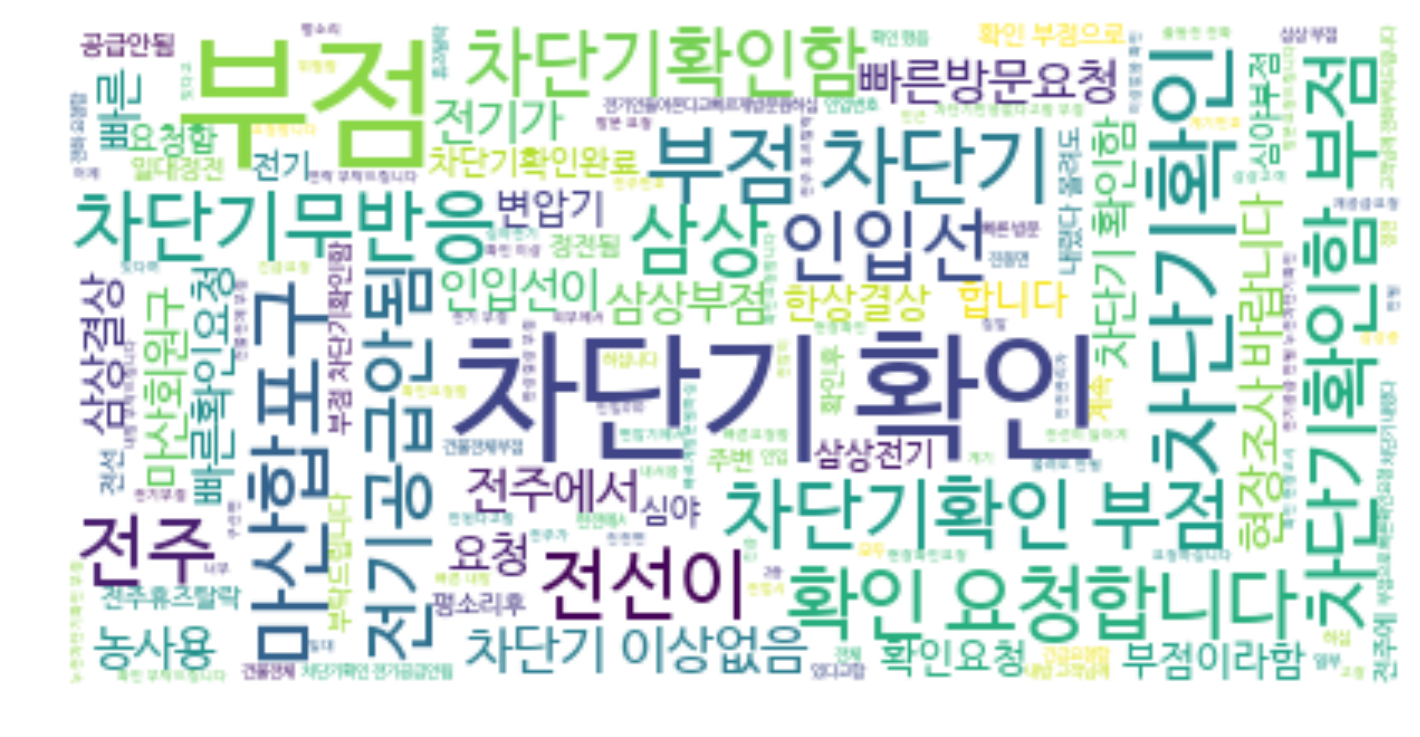

In [0]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show() 

In [0]:
#저장된 모델 파일을 불러올 경우
model = word2vec.Word2Vec.load('./gdrive/My Drive/result/text_101.model')
#키워드가 유사한 단어를 찾을 경우
print(model.wv.most_similar(positive= ["차단기"]))


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


KeyError: ignored

In [0]:
print(model.wv.most_similar(positive=['확인']))
#similarity(A,B) A와 B의 유사도 
print(model.wv.similarity('부점','차단기'))
#이상한 키워드 찾기
print(model.wv.doesnt_match("변압기 소리 완전 이상".split()))